In [1]:
#importing required libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:

# Reading the data

boombikes = pd.read_csv('day.csv')
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Checking the shape of datatframe
boombikes.shape


(730, 16)

In [4]:
#Checking null values for each column:

boombikes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#dropping the duplicates and checking the shape

boombikes.drop_duplicates(subset=None, inplace=True)
boombikes.shape

(730, 16)

In [6]:
#fixing the column names

boombikes = boombikes.rename(columns = {'yr':'year', 'mnth':'month', 'atemp':'apparent_temp', 'hum':'humidity', 'cnt':'count'}) 


In [7]:

#checking Summary:
boombikes.describe()


,instant,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,casual,registered,count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# mapping according to Data Dictionary
# season, year, month, weekday, weathersit

boombikes['season']=boombikes['season'].map({1: 'spring', 2: 'summer',3:'fall', 4:'winter'})
boombikes['year']=boombikes['year'].map({0: '2018', 1: '2019'})
boombikes['month']=boombikes['month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
boombikes['weekday']=boombikes['weekday'].map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})
boombikes['weathersit']=boombikes['weathersit'].map({1: 'Clear/Partly Cloudy', 2:'Mist/Cloudy', 3:'Light Snow/Rain', 4:'Heavy Snow/Rain/Hail/Fog'})

boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Converting 'dteday' column to date time format as per dictionary
boombikes['dteday'] = pd.to_datetime(boombikes['dteday'], format='%d-%m-%Y')


# checking datatype of dteday
print(boombikes.dtypes['dteday'])

datetime64[ns]


In [10]:
boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,casual,registered,count
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-01-02,spring,2018,Jan,0,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-01-03,spring,2018,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
#sum of two independent variables 'casual' and 'registered'

boombikes['total_count'] = boombikes['casual'] + boombikes['registered']
boombikes[['total_count','count']].corr()

,total_count,count
total_count,1.0,1.0
count,1.0,1.0


In [12]:
# dropping columns 'casual', 'registered' and 'total_count' for correlation
boombikes.drop(['casual','registered', 'total_count'],axis=1,inplace=True)
boombikes.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,apparent_temp,humidity,windspeed,count
0,1,2018-01-01,spring,2018,Jan,0,Sat,0,Mist/Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,2,2018-01-02,spring,2018,Jan,0,Sun,0,Mist/Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,3,2018-01-03,spring,2018,Jan,0,Mon,1,Clear/Partly Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,4,2018-01-04,spring,2018,Jan,0,Tue,1,Clear/Partly Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,5,2018-01-05,spring,2018,Jan,0,Wed,1,Clear/Partly Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
#Checking unique values
boombikes.nunique().sort_values()


year               2
holiday            2
workingday         2
weathersit         3
season             4
weekday            7
month             12
temp             498
humidity         594
windspeed        649
apparent_temp    689
count            695
instant          730
dteday           730
dtype: int64

In [14]:
# Dropping column 'instant' as all values are unique.
# Dropping 'dteday' as we already have the columns 'year' and 'month' for the same. 

boombikes.drop(['instant','dteday'],axis=1,inplace=True)
boombikes.shape

(730, 12)

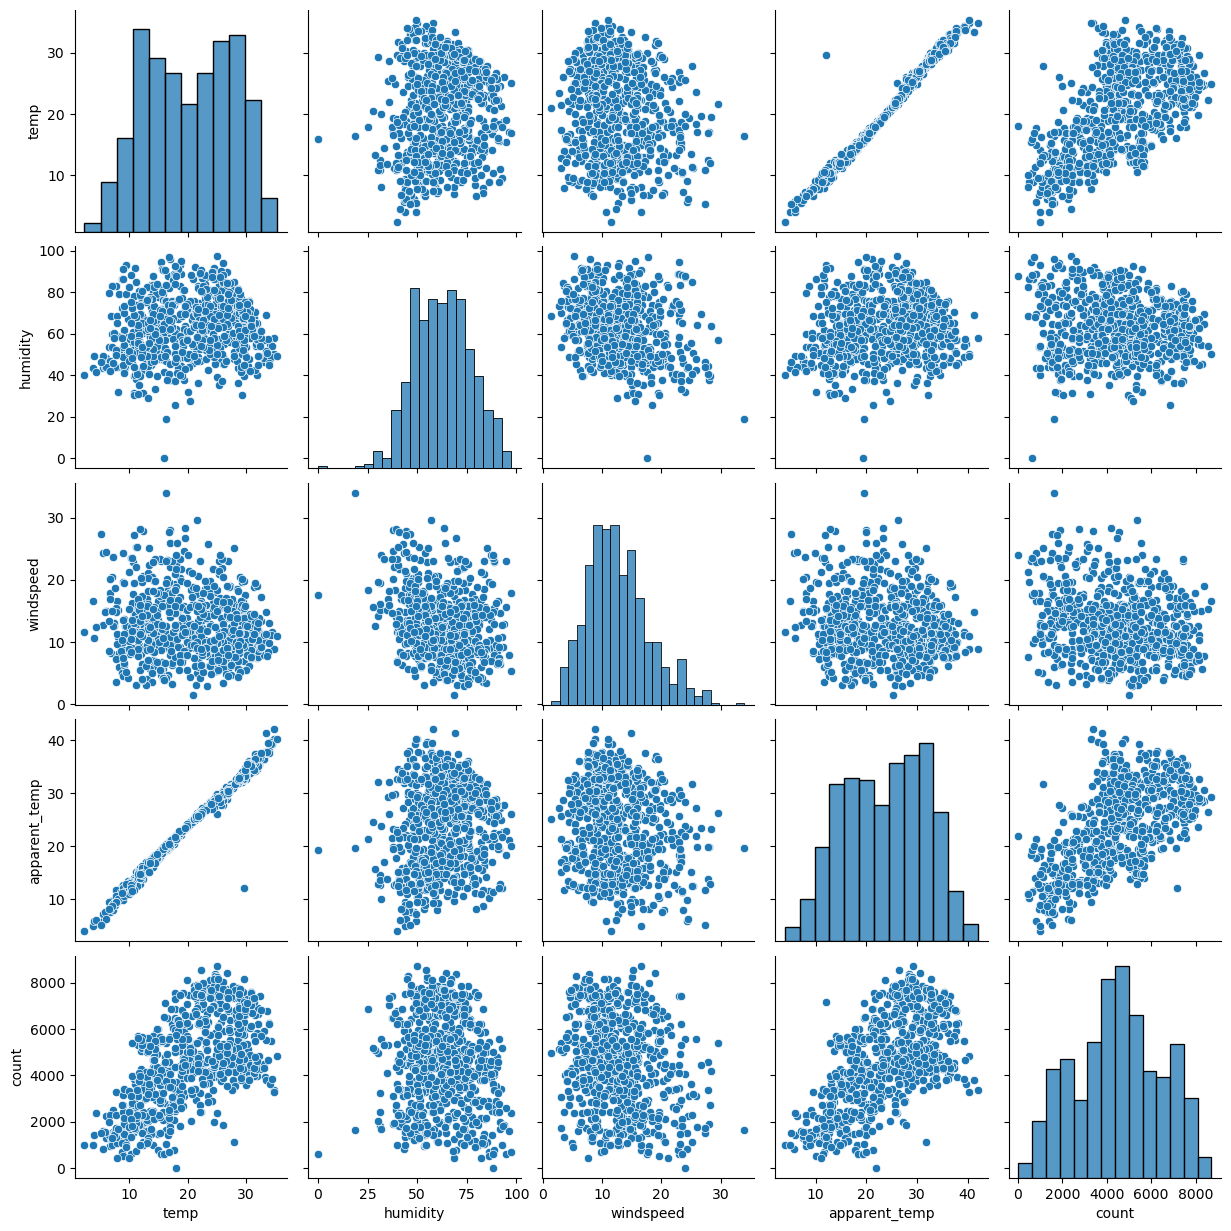

In [15]:
#Data Visualization

#Pairplot of all numeric variables.

list_numeric = ['temp', 'humidity', 'windspeed', 'apparent_temp', 'count']
sns.pairplot(boombikes[list_numeric])
plt.show()

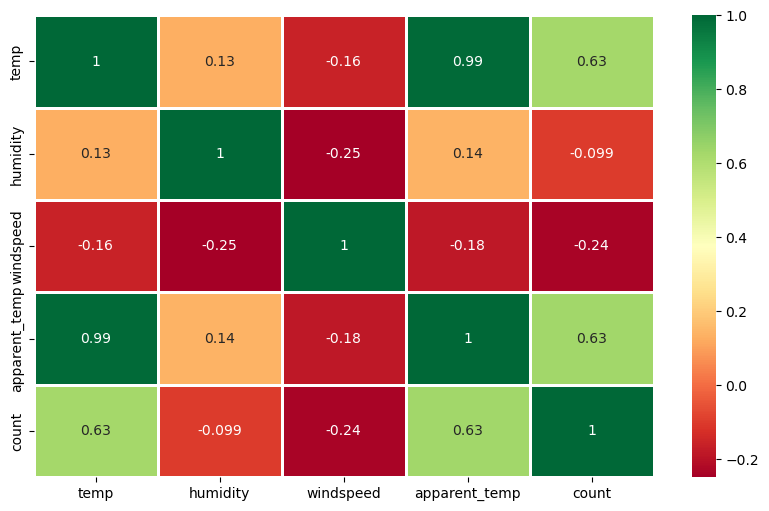

In [16]:
#Plot a heatmap for continuos variables.

plt.figure(figsize = (10,6))
ax= sns.heatmap(boombikes[list_numeric].corr(), annot = True, cmap="RdYlGn",linewidth =1)

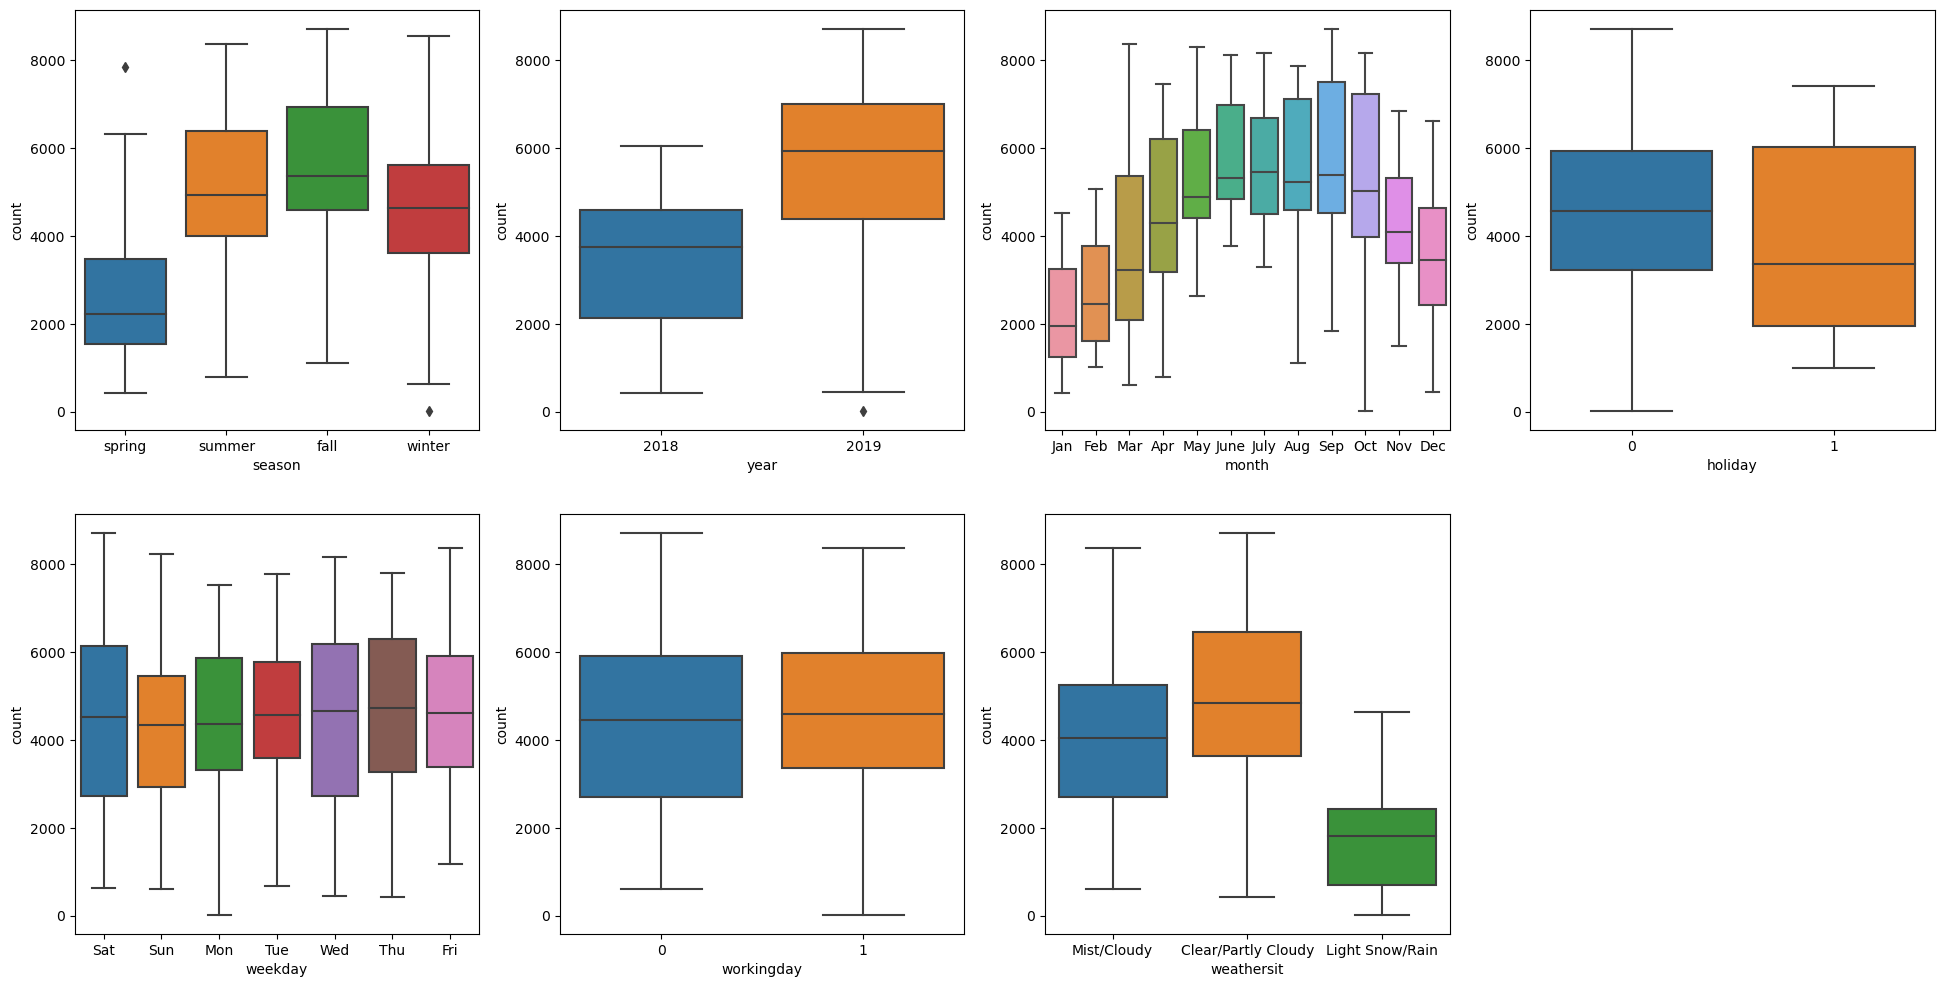

In [17]:
#Box plot for categorical variables.

plt.figure(figsize=(24, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = boombikes)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = boombikes)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = boombikes)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = boombikes)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = boombikes)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = boombikes)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = boombikes)
plt.show()

In [18]:
# Creating function for analysis of categorical vaiable

def plots_for_categories(cat_variable):
    # Calculating percentage of booking against each respective category
    bikes_cat_v = boombikes.pivot_table(index = [cat_variable], values =['count'], aggfunc ='sum')
    bikes_cat_v['count %age'] = (bikes_cat_v['count']/bikes_cat_v['count'].sum())*100
    print(bikes_cat_v['count %age'].sort_values(ascending=False))

    bikes_cat_v.plot(kind= 'bar')
    # Plotting the count based on categorical variable chosen
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)    
    sns.barplot(x=cat_variable, y='count', data=boombikes)
    plt.subplot(1,2,2)
    sns.barplot(x=cat_variable, y='count', data=boombikes, hue='year')
    plt.suptitle('Bike Rentals vs ' + cat_variable)
    plt.show()
    return

season
fall      32.244879
summer    27.913469
winter    25.574374
spring    14.267278
Name: count %age, dtype: float64


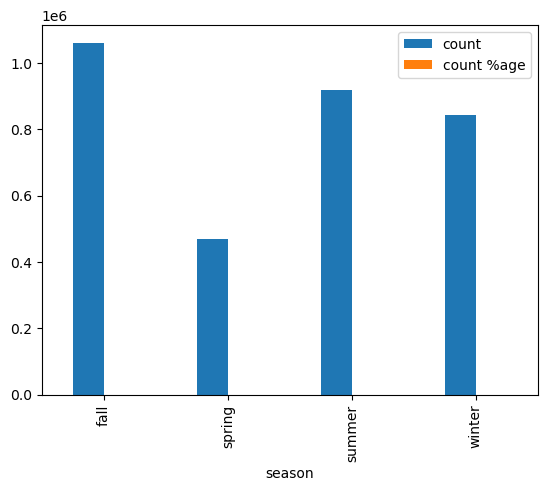

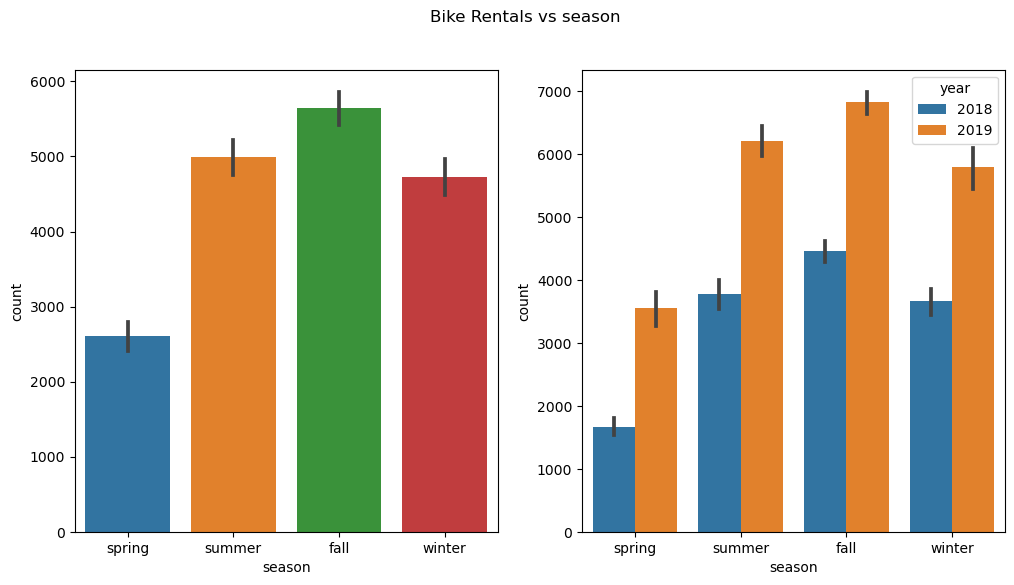

In [19]:
plots_for_categories('season')


month
Aug     10.671849
June    10.524409
Sep     10.513743
July    10.482049
May     10.079053
Oct      9.795417
Apr      8.177049
Nov      7.743634
Mar      6.956268
Dec      6.412821
Feb      4.543453
Jan      4.100254
Name: count %age, dtype: float64


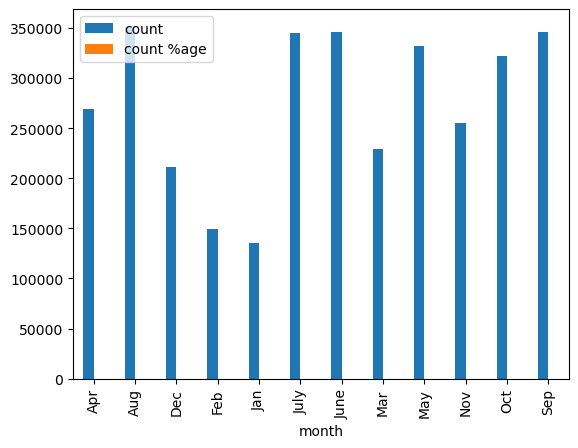

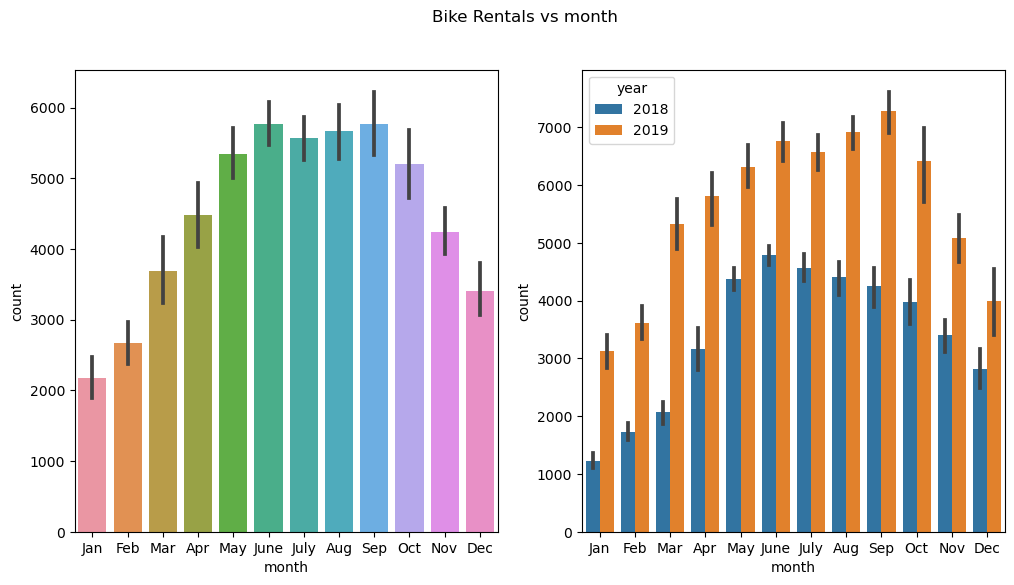

In [20]:
plots_for_categories('month')


holiday
0    97.61657
1     2.38343
Name: count %age, dtype: float64


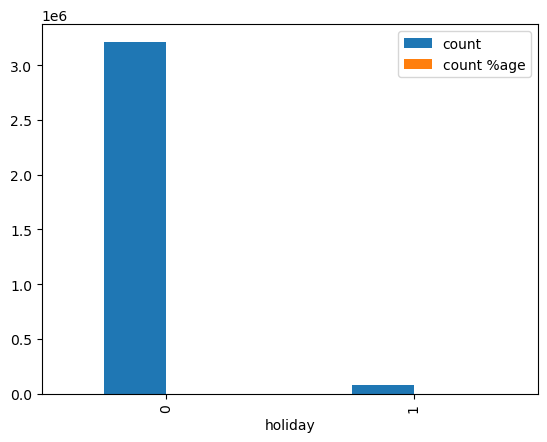

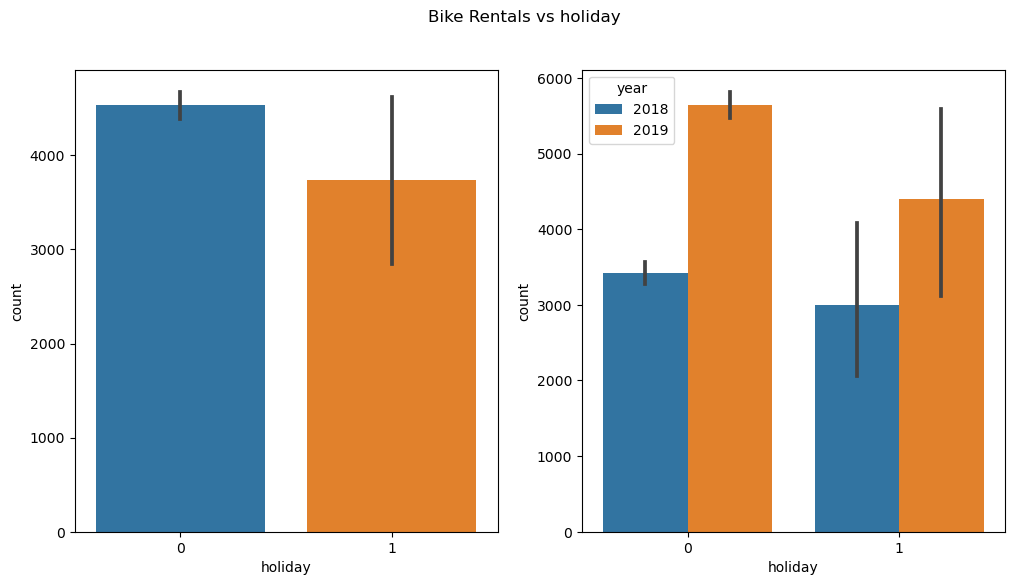

In [21]:
plots_for_categories('holiday')


weekday
Fri    14.822637
Thu    14.749859
Sat    14.519280
Wed    14.318936
Tue    14.254971
Mon    13.841521
Sun    13.492796
Name: count %age, dtype: float64


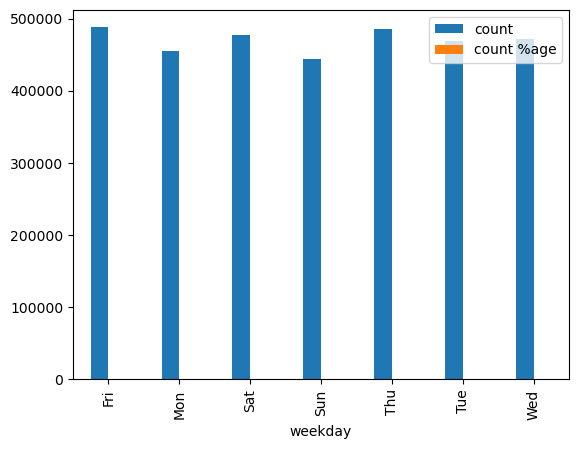

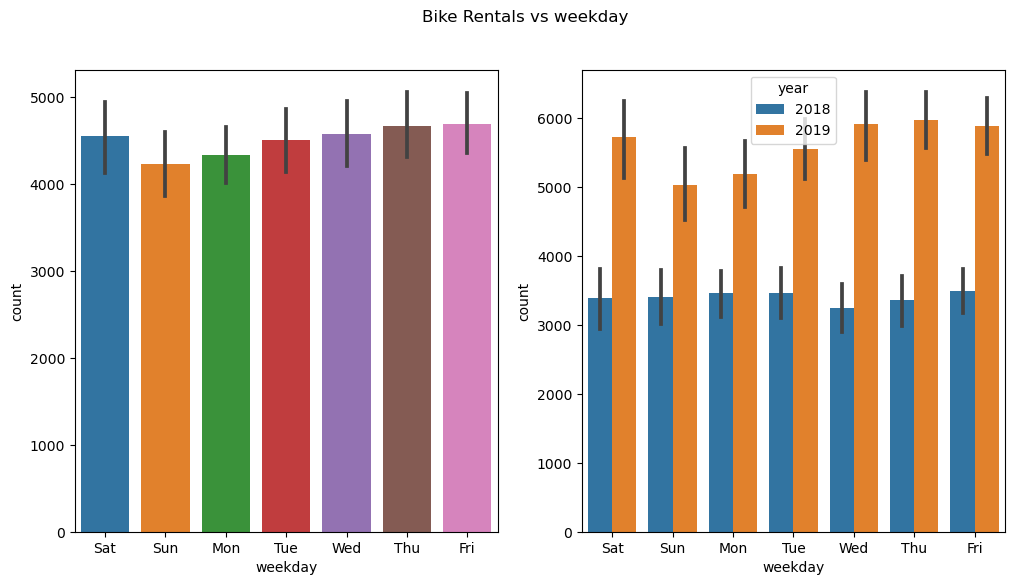

In [22]:
plots_for_categories('weekday')


workingday
1    69.604494
0    30.395506
Name: count %age, dtype: float64


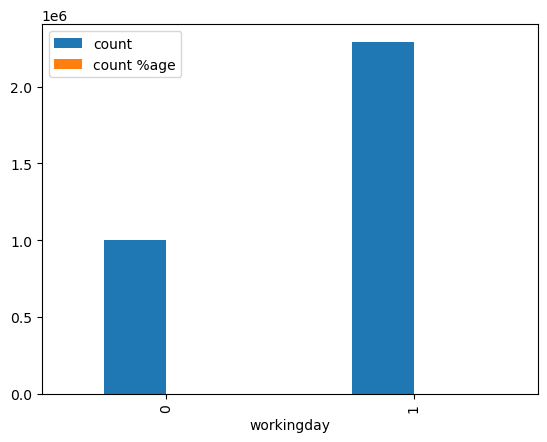

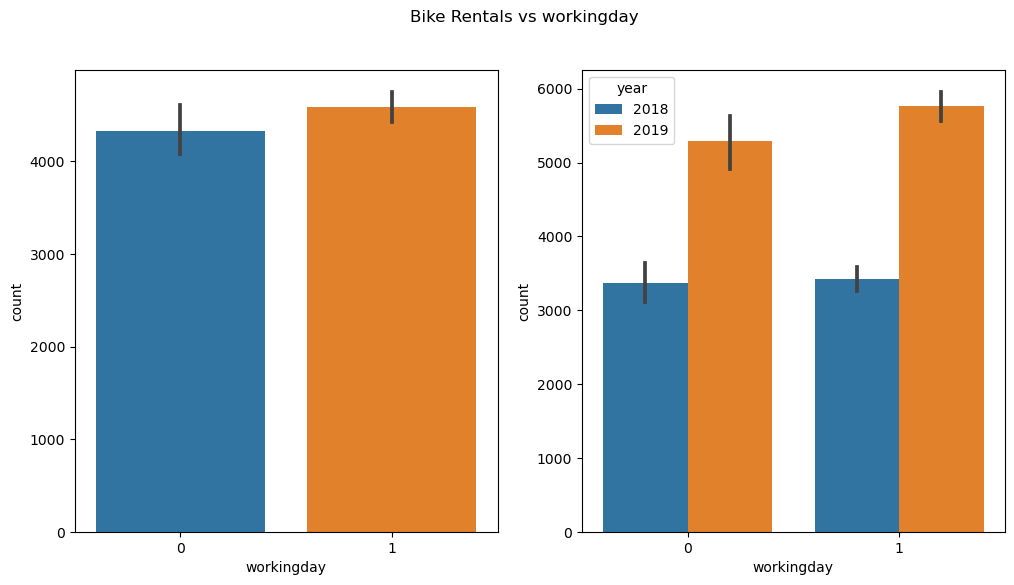

In [23]:
plots_for_categories('workingday')


weathersit
Clear/Partly Cloudy    68.613137
Mist/Cloudy            30.236125
Light Snow/Rain         1.150738
Name: count %age, dtype: float64


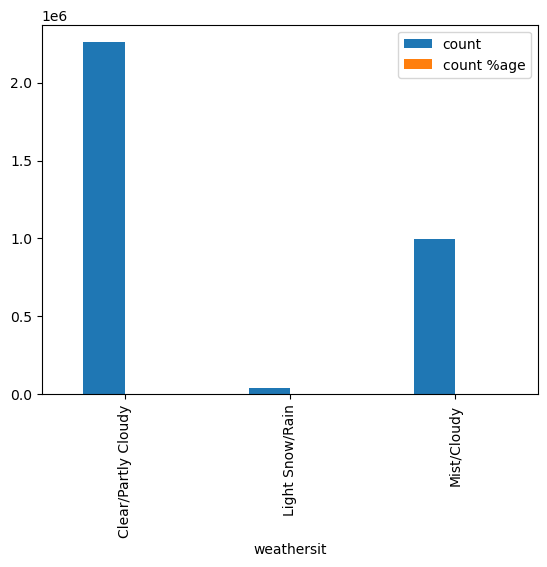

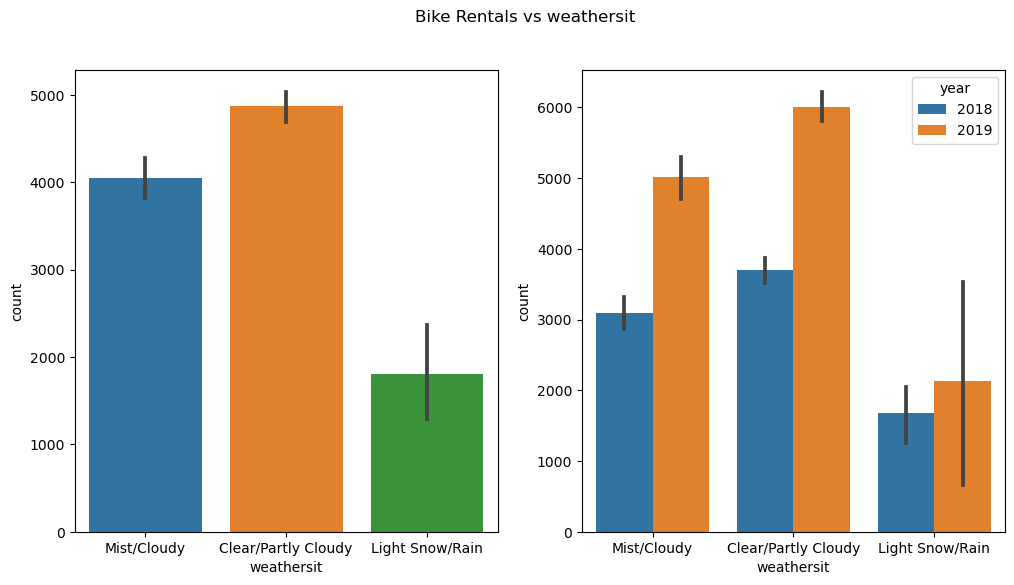

In [24]:
plots_for_categories('weathersit')


In [25]:
boombikes.shape


(730, 12)

In [26]:
#Dummy Variable creation

list_categorical = ['season','month','weekday','weathersit']

# Create dummy variables with int or uint8 dtype
boombikes_dumy = pd.get_dummies(data=boombikes, columns=list_categorical, drop_first=True, dtype='uint8')

# Now boombikes_dumy contains dummy variables with int or uint8 dtype
boombikes_dumy.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
boombikes_dumy.shape

(730, 30)

In [28]:
boombikes_dumy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    object 
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   apparent_temp               730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

In [29]:

# # changing 'year' column as well to 0 and 1 for model training

boombikes_dumy['year']=boombikes['year'].map({'2018': 0,'2019': 1})


In [30]:
boombikes_dumy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   apparent_temp               730 non-null    float64
 5   humidity                    730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   count                       730 non-null    int64  
 8   season_spring               730 non-null    uint8  
 9   season_summer               730 non-null    uint8  
 10  season_winter               730 non-null    uint8  
 11  month_Aug                   730 non-null    uint8  
 12  month_Dec                   730 non-null    uint8  
 13  month_Feb                   730 non

In [31]:
# Splitting the Data into Training and Testing Sets with 80:20 split

# Just to make sure train and test data set always have the same rows

np.random.seed(0)
boombikes_train, boombikes_test = train_test_split(boombikes_dumy, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
# Validating shape of train and test data
boombikes_train.shape


(510, 30)

In [33]:
boombikes_test.shape


(219, 30)

In [34]:

# Rescaling using Min-Max scaling

scaler = MinMaxScaler()

# Apply scaler() to all nominal variable

boombikes_train[list_numeric] = scaler.fit_transform(boombikes_train[list_numeric])
boombikes_train.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [35]:
boombikes_train.describe()


,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


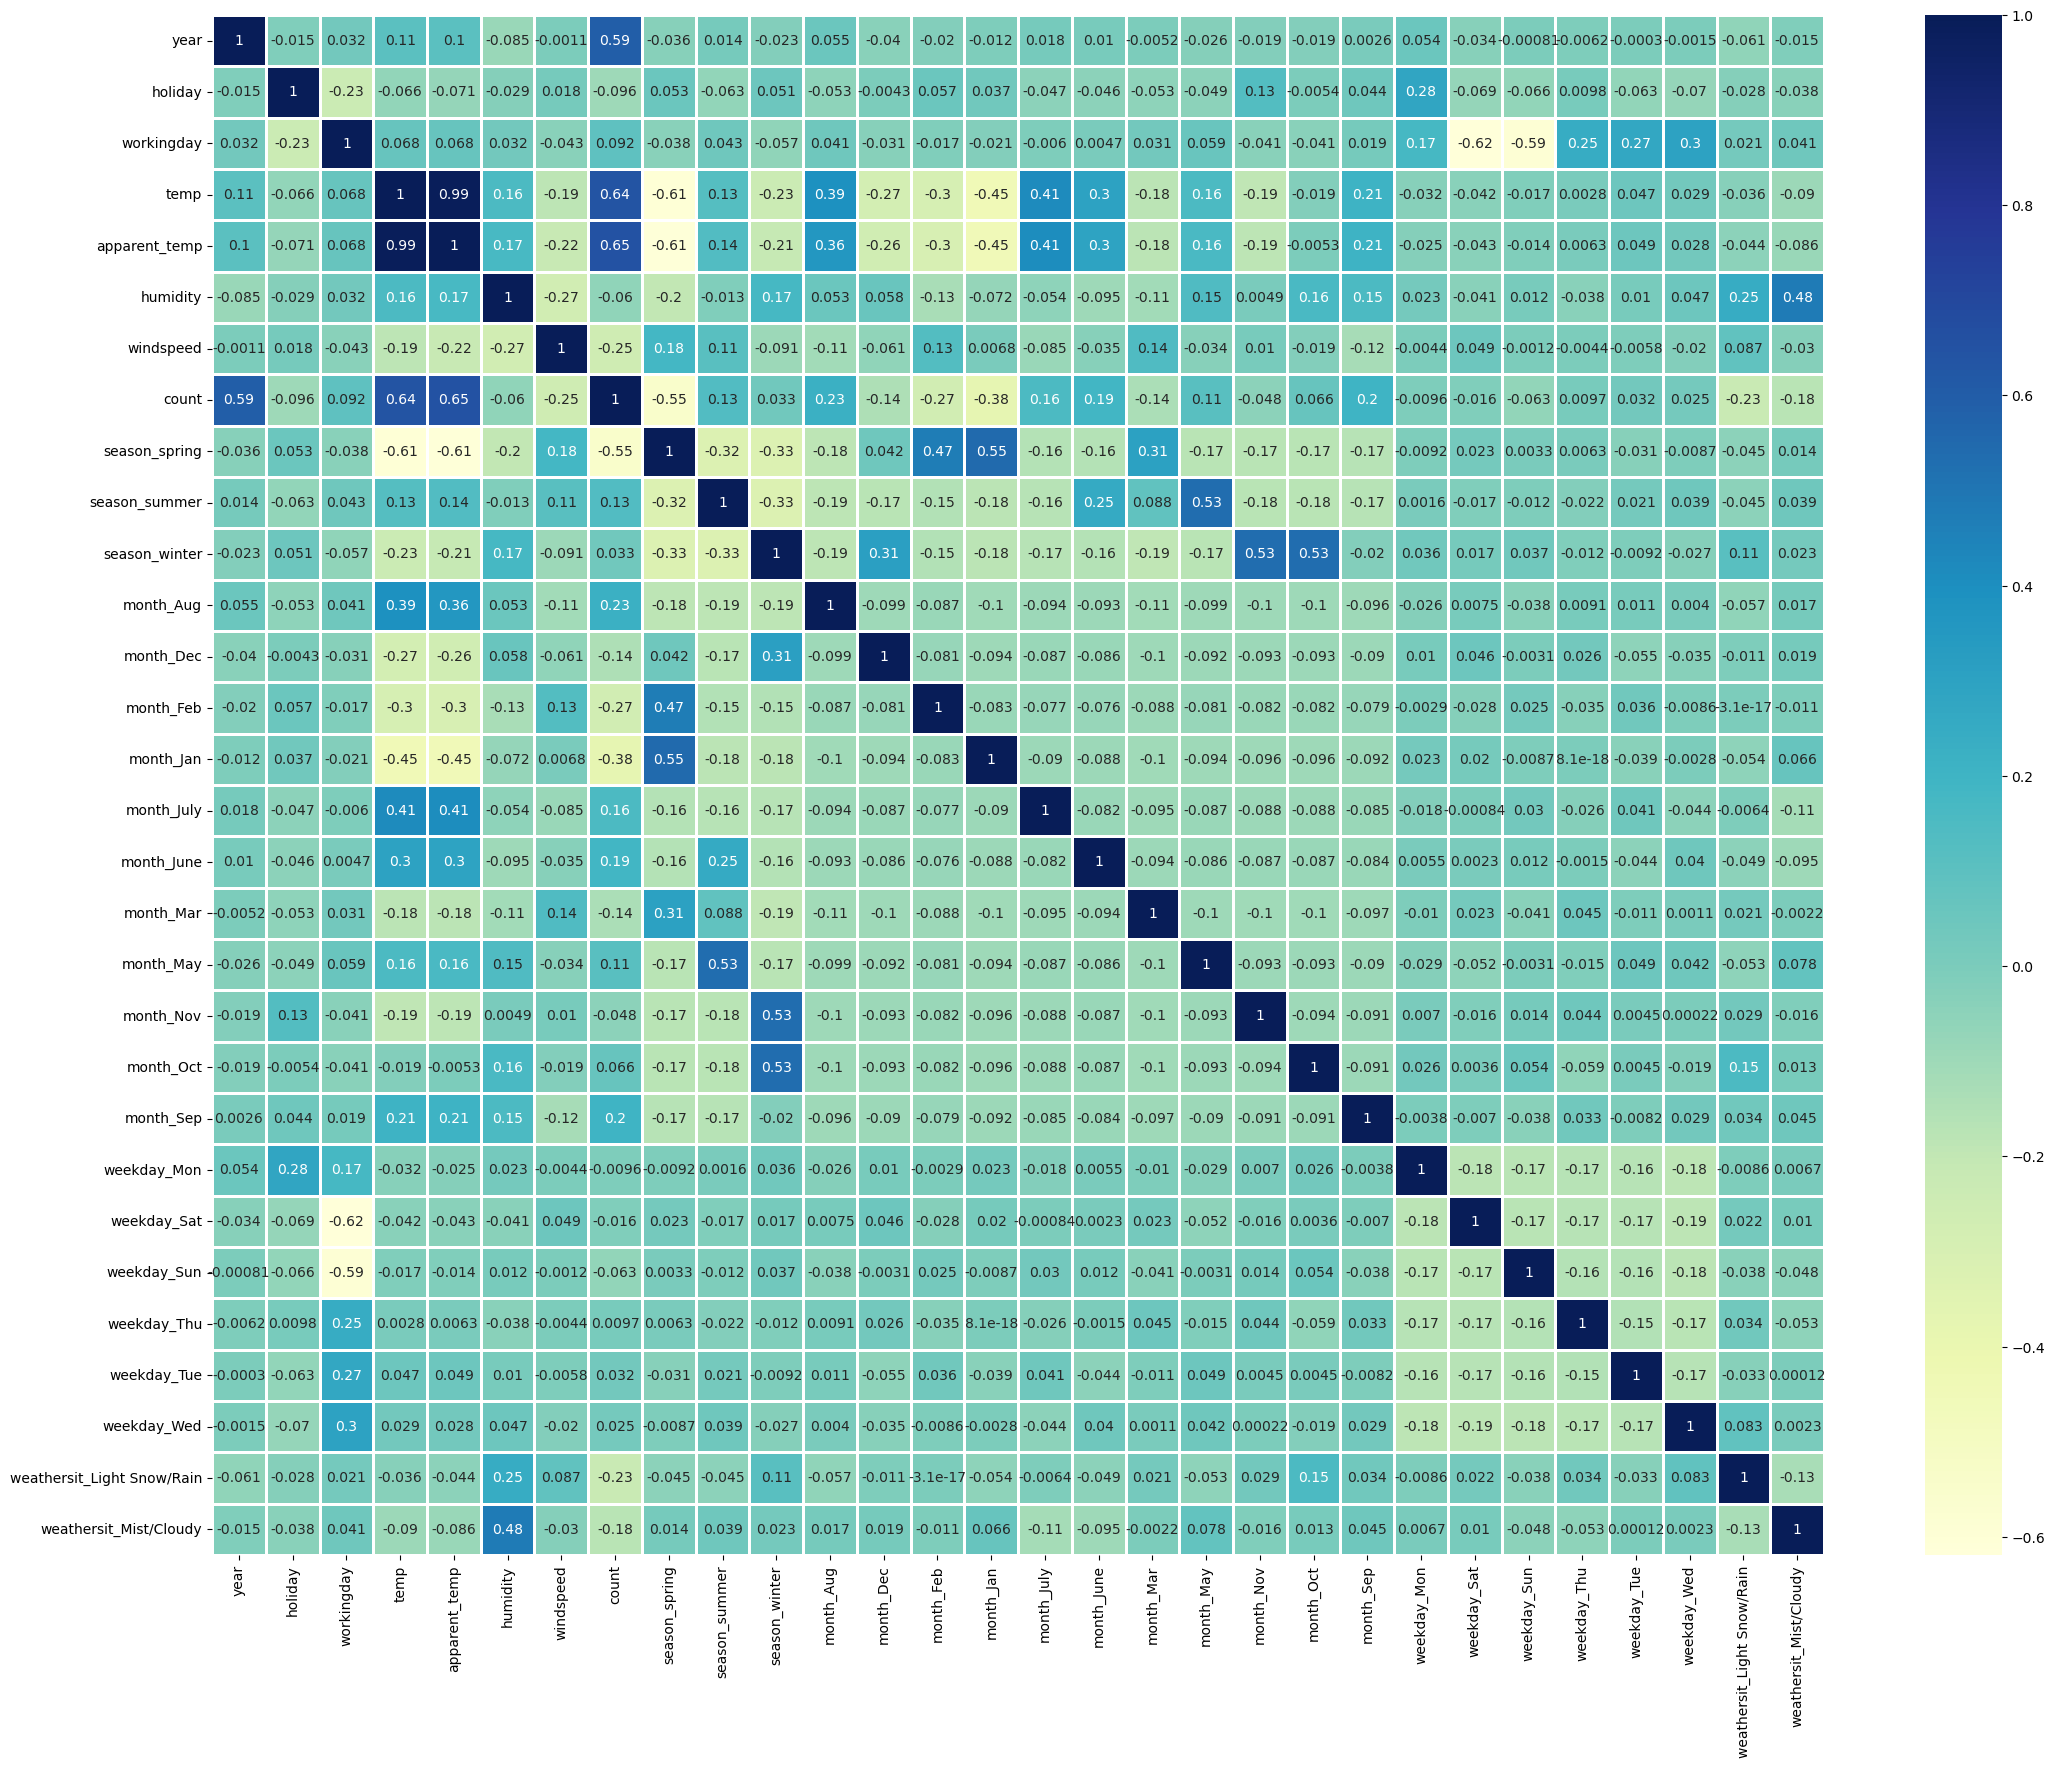

In [36]:
# # Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (26, 20))
sns.heatmap(boombikes_train.corr(), annot = True, cmap="YlGnBu", linewidth=1)
plt.show()

In [37]:
# Dividing into X and Y sets for the model building

X_train = boombikes_train
y_train = boombikes_train.pop('count')

In [38]:
#  Building a Linear Model RFE using SciKitLearn

lrm = LinearRegression()
lrm.fit(X_train, y_train)

pr = RFE(lrm, n_features_to_select=15)
pr = pr.fit(X_train, y_train)

In [39]:
list(zip(X_train.columns,pr.support_,pr.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('apparent_temp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_Aug', False, 13),
 ('month_Dec', False, 3),
 ('month_Feb', False, 4),
 ('month_Jan', True, 1),
 ('month_July', True, 1),
 ('month_June', False, 5),
 ('month_Mar', False, 9),
 ('month_May', False, 15),
 ('month_Nov', False, 2),
 ('month_Oct', False, 11),
 ('month_Sep', True, 1),
 ('weekday_Mon', False, 14),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Mist/Cloudy', True, 1)]

In [40]:
#The list of top 15 predictor variables after running RFE
pred =  X_train.columns[pr.support_]
pred

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_Jan',
       'month_July', 'month_Sep', 'weekday_Sat', 'weathersit_Light Snow/Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')

In [41]:
X_train.columns[~pr.support_]


Index(['apparent_temp', 'month_Aug', 'month_Dec', 'month_Feb', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Mon',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [42]:
X_train_pr = X_train[pred]


In [43]:
# Model 1

X_train_lrm1 = sm.add_constant(X_train_pr)

# building first fitted model
lrr_1 = sm.OLS(y_train, X_train_lrm1).fit()

# summary statistics of model obtained
print(lrr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          2.31e-191
Time:                        00:52:56   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [44]:
# Check the VIF values of feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF
def VIF_Check(X_train_df):
    vif = pd.DataFrame()
    vif['Features'] = X_train_df.columns
    vif['VIF'] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [45]:
VIF_Check(X_train_pr)


,Features,VIF
4,humidity,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.48
7,season_summer,2.84
14,weathersit_Mist/Cloudy,2.29
0,year,2.09
12,weekday_Sat,1.98


In [46]:
#Model - 2

X2 = X_train_pr.drop('humidity', axis=1)

# Adding constant
X_train_lm2 = sm.add_constant(X2)

# building second fitted model
lrr_2 = sm.OLS(y_train, X_train_lm2).fit()

# summary statistics of model obtained
print(lrr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          7.33e-189
Time:                        00:52:56   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [47]:
VIF_Check(X2)


,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,year,2.08
7,season_winter,1.99
11,weekday_Sat,1.97
8,month_Jan,1.62
9,month_July,1.59


In [48]:
#Model - 3

X3 = X2.drop('holiday', axis=1)

# Adding constant
X_train_lmm3 = sm.add_constant(X3)

# building third fitted model
lrr_3 = sm.OLS(y_train, X_train_lmm3).fit()

# summary statistics of model obtained
print(lrr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          4.11e-189
Time:                        00:52:56   Log-Likelihood:                 508.99
No. Observations:                 510   AIC:                            -990.0
Df Residuals:                     496   BIC:                            -930.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [49]:
VIF_Check(X3)


,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.31
0,year,2.08
6,season_winter,1.92
10,weekday_Sat,1.84
7,month_Jan,1.62
8,month_July,1.59


In [50]:
#Model - 4

X4 = X3.drop('month_Jan', axis=1)

# Adding constant
X_train_lmm4 = sm.add_constant(X4)

# building fourth fitted model
lrr_4 = sm.OLS(y_train, X_train_lmm4).fit()

# summary statistics of model obtained
print(lrr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.1
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          3.28e-189
Time:                        00:52:56   Log-Likelihood:                 506.42
No. Observations:                 510   AIC:                            -986.8
Df Residuals:                     497   BIC:                            -931.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [51]:
VIF_Check(X4)


,Features,VIF
2,temp,6.73
1,workingday,4.65
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.31
0,year,2.07
6,season_winter,1.92
9,weekday_Sat,1.83
7,month_July,1.58
11,weathersit_Mist/Cloudy,1.56


In [52]:
#Model - 5

# Dropping insignificant variable 'month_July'
X5 = X4.drop('month_July', axis=1)

# Adding constant
X_train_lmm5 = sm.add_constant(X5)

# building fifth fitted model
lrr_5 = sm.OLS(y_train, X_train_lmm5).fit()

# summary statistics of model obtained
print(lrr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     234.4
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          6.86e-189
Time:                        00:52:56   Log-Likelihood:                 502.83
No. Observations:                 510   AIC:                            -981.7
Df Residuals:                     498   BIC:                            -930.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [53]:
VIF_Check(X5)


,Features,VIF
2,temp,5.48
1,workingday,4.65
3,windspeed,4.63
4,season_spring,2.30
0,year,2.07
5,season_summer,1.99
8,weekday_Sat,1.83
6,season_winter,1.77
10,weathersit_Mist/Cloudy,1.56
7,month_Sep,1.23


In [54]:
#Model - 6

X6 = X5.drop('season_spring', axis=1)

# Adding constant
X_train_lmm6 = sm.add_constant(X6)

# building sixth fitted model
lrr_6 = sm.OLS(y_train, X_train_lmm6).fit()

# summary statistics of model obtained
print(lrr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Thu, 15 Feb 2024   Prob (F-statistic):          1.47e-188
Time:                        00:52:56   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [55]:
VIF_Check(X6)


,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.43
0,year,2.02
7,weekday_Sat,1.69
4,season_summer,1.57
9,weathersit_Mist/Cloudy,1.53
5,season_winter,1.40
6,month_Sep,1.20
8,weathersit_Light Snow/Rain,1.08


In [56]:
# Model - 7

# Dropping variable 'temp'
X7 = X6.drop('temp', axis=1)

# Adding constant
X_train_lmm7 = sm.add_constant(X7)

# building seventh fitted model
lrr_7 = sm.OLS(y_train, X_train_lmm7).fit()

# summary statistics of model obtained
print(lrr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     76.68
Date:                Thu, 15 Feb 2024   Prob (F-statistic):           2.30e-88
Time:                        00:52:56   Log-Likelihood:                 259.65
No. Observations:                 510   AIC:                            -499.3
Df Residuals:                     500   BIC:                            -456.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [57]:
VIF_Check(X7)


,Features,VIF
2,windspeed,3.25
1,workingday,3.14
0,year,1.88
8,weathersit_Mist/Cloudy,1.53
6,weekday_Sat,1.52
3,season_summer,1.50
4,season_winter,1.40
5,month_Sep,1.11
7,weathersit_Light Snow/Rain,1.08


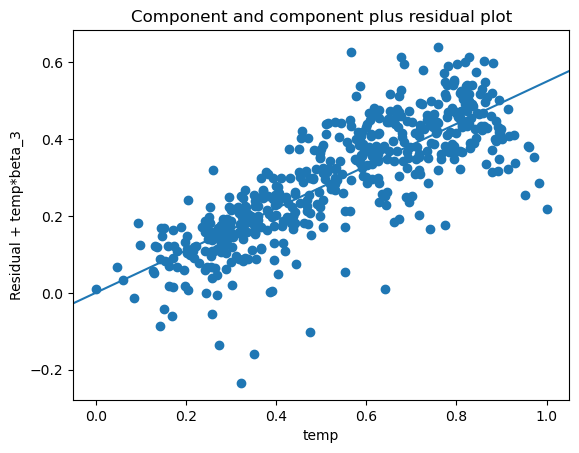

In [58]:
 #Assumption of linearty check
sm.graphics.plot_ccpr(lrr_6, 'temp')
plt.show()

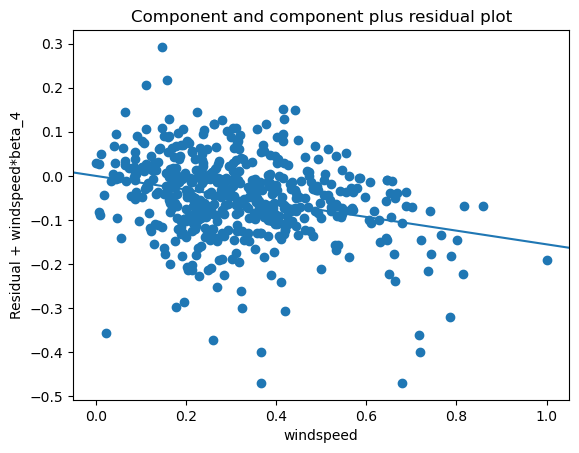

In [59]:
sm.graphics.plot_ccpr(lrr_6, 'windspeed')
plt.show()

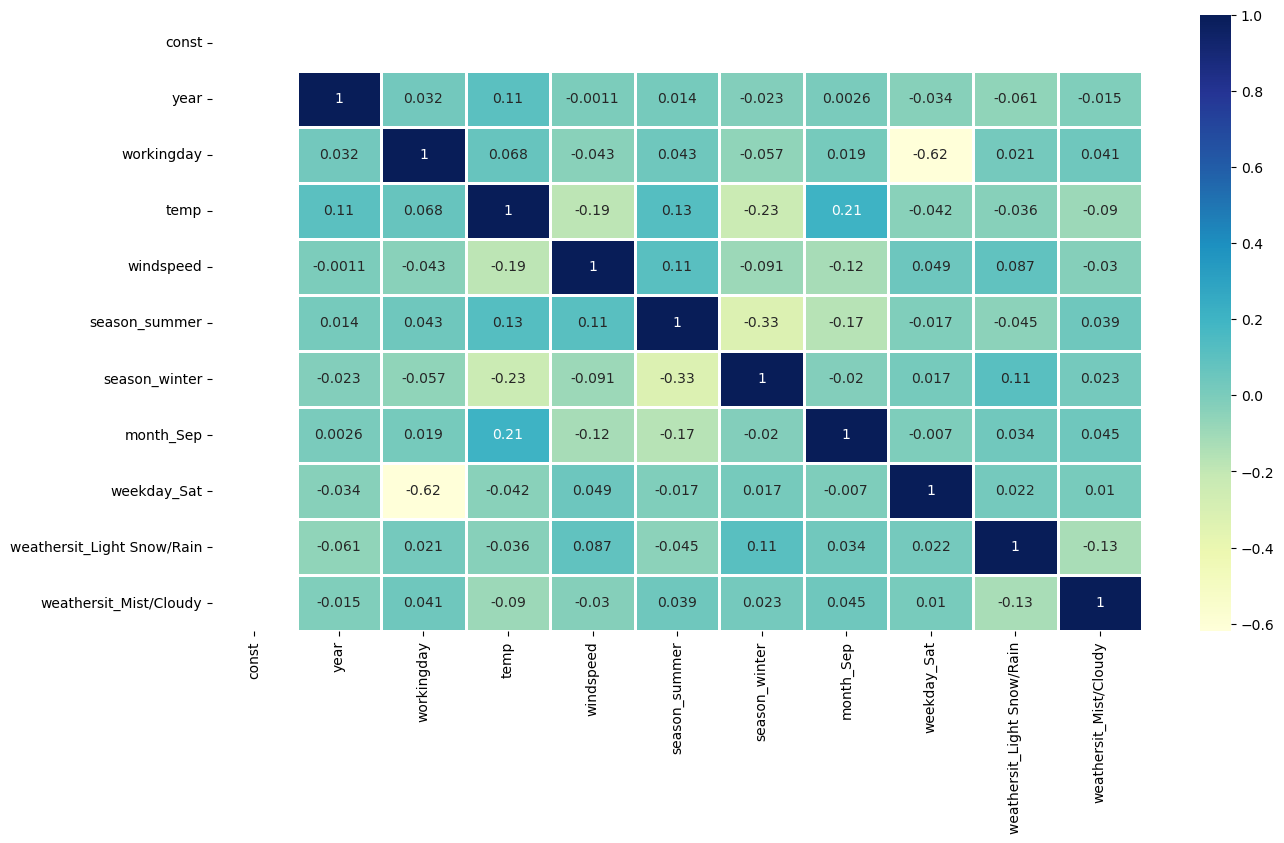

In [60]:
# Multicolinearity check
# Plotting heat map to check multicollinearity between predictor variables


plt.figure(figsize=(15,8))
sns.heatmap(X_train_lmm6.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

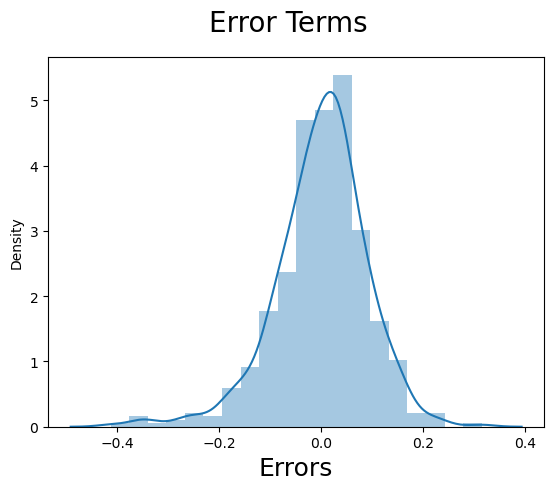

In [61]:
# Residual Analysis of the Training data

y_train_pred = lrr_6.predict(X_train_lmm6)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

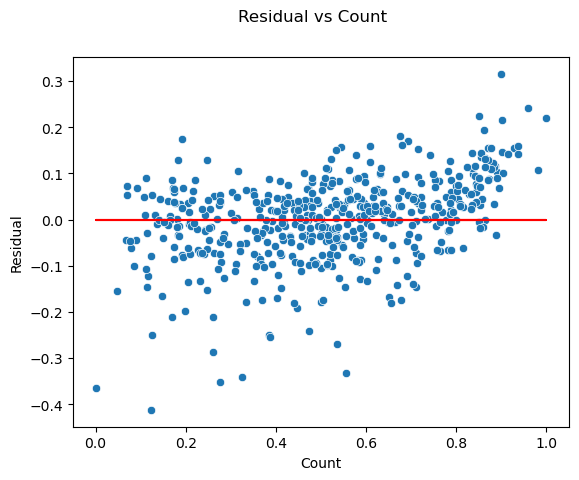

In [62]:
# plotting residual vs count scatter plot
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

In [63]:
boombikes_test[list_numeric] = scaler.transform(boombikes_test[list_numeric])

boombikes_test.head()

,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [64]:
boombikes_test.describe()


,year,holiday,workingday,temp,apparent_temp,humidity,windspeed,count,season_spring,season_summer,...,month_Oct,month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Mist/Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
print('Durbin-Watson value for the Final Model is',round(sm.stats.stattools.durbin_watson(residual),4))


Durbin-Watson value for the Final Model is 2.08


In [66]:


# Dividing into X_test and y_test dataframes
# Dividing into X_test and y_test dataframes
y_test = boombikes_test.pop('count')
X_test = boombikes_test

# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

# Dropping variables from X_test_m6
X_test_m6 = X_test_m6[X_train_lmm6.columns]

# Making predictions using the seventh model
y_pred_m6 = lrr_6.predict(X_test_m6)

In [67]:
print(boombikes_test.columns)


Index(['year', 'holiday', 'workingday', 'temp', 'apparent_temp', 'humidity',
       'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_July',
       'month_June', 'month_Mar', 'month_May', 'month_Nov', 'month_Oct',
       'month_Sep', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow/Rain',
       'weathersit_Mist/Cloudy'],
      dtype='object')


In [68]:
# R-square for test

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred_m6)
print(r2)

# n is number of rows in test dataset
n = X_test_m6.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_m6.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.7955844377237249
0.7847


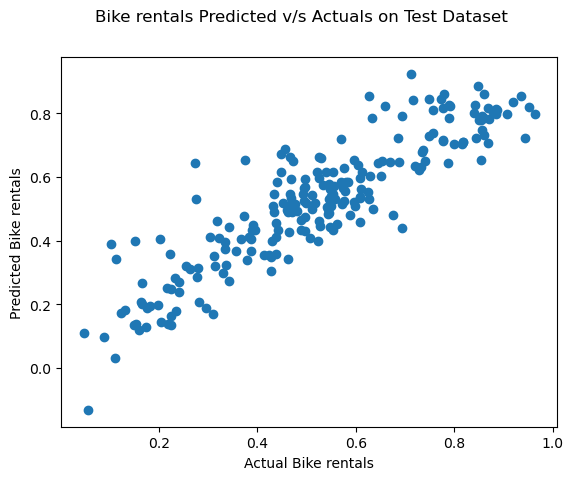

In [69]:
fig = plt.figure()
plt.scatter(y_test, y_pred_m6)
fig.suptitle('Bike rentals Predicted v/s Actuals on Test Dataset')        # Plot heading 
plt.xlabel('Actual Bike rentals')                                         # X-label
plt.ylabel('Predicted Bike rentals')  
plt.show()

#Observations:
 
The pairplot and heat map has similar observation

From visualizing categorical varibles we found the below:
    
1. The shared bikes demand is more during the FALL followed by SUMMER (Riding conditions are favourable)
2. Demand of shared bikes is more in 2019 than in 2018.
3. The demand of bikes is more in the months from May to October.
4. Most shared bikes  rented on 'Clear, Few clouds, Partly cloudy' day.
5. No record of any bike rental on a 'Heavy Snow/Rain/Hail/Fog'day
6. Almost 69.6% of bike rentals are happening on a working day. It is very good predictor variable.

Final Metrices:

1) Training R-squared : 0.836
2) Training Adjusted R-squared : 0.832
3) Test R-squared: 0.796
4) Test Adjusted R-squared: 0.785
5) Difference in the R-squared between Training and Test dataset: 4%
6) Difference in the adjusted R-squared between Training and test:4.7% which is (<5%)
    
#MODEL SUMMARY:
1. Model 6 has all the p-values and VIFs inrange. F-statistic value is also close to zero and it is a good fit.
2. The temp with the coefficient of 0.5499
3. weathersit_Light Snow/Rain (weathersit = 3) with a coefficient of -0.2880
4. The year (yr) with a coefficient of 0.2331
